## **XGBoost**

In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

# Evitamos los molestos warnings
warnings.simplefilter("ignore")

In [3]:
# Dataset
data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/adult.data.csv', sep=', ', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
headers = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
            'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hours-per-week', 'Native-country', 'Target']

data.columns = headers
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
hours-per-week     int64
Native-country    object
Target            object
dtype: object

In [6]:
data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
hours-per-week    0
Native-country    0
Target            0
dtype: int64

In [7]:
# Target igual a un problema binario
data['Target'].value_counts()

<=50K    24720
>50K      7841
Name: Target, dtype: int64

In [8]:
# Transformamos el target en variables binaria 0 ó 1
from sklearn.preprocessing import LabelEncoder

# Etiquetar
le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])

In [9]:
# Target lo volvemos a ver
data['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [10]:
# Dimensiones
data.shape

(32561, 15)

### **Features engineering**

In [11]:
# Observamos los datos que más se repiten en una columna
data['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [12]:
# Nuevo feature
data['trabajan<=40'] = np.where(data['hours-per-week'] <= 40, 1, 0)

In [13]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,Native-country,Target,trabajan<=40
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


In [14]:
# Resultados
data['trabajan<=40'].value_counts()

1    22980
0     9581
Name: trabajan<=40, dtype: int64

In [15]:
# Etiquetar según el género
data['Sex'] = le.fit_transform(data['Sex'])

In [16]:
# Resultados
data['Sex'].value_counts()

1    21790
0    10771
Name: Sex, dtype: int64

In [17]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,Native-country,Target,trabajan<=40
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0,1


In [18]:
# Nombres de las columnas
data.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'hours-per-week', 'Native-country',
       'Target', 'trabajan<=40'],
      dtype='object')

In [19]:
# Transformamos cada una de las categorías en sus respectivas frecuencias
categorias_columnas = ['Workclass', 'Education', 'Marital-status', 'Occupation', 
                      'Relationship', 'Race', 'Native-country']

for categoria in categorias_columnas:

    data[categoria] = data.groupby(categoria)[categoria].transform('count')

In [20]:
# Resultado
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,Native-country,Target,trabajan<=40
0,39,1298,77516,5355,13,10683,3770,8305,27816,1,2174,0,40,29170,0,1
1,50,2541,83311,5355,13,14976,4066,13193,27816,1,0,0,13,29170,0,1
2,38,22696,215646,10501,9,4443,1370,8305,27816,1,0,0,40,29170,0,1
3,53,22696,234721,1175,7,14976,1370,13193,3124,1,0,0,40,29170,0,1
4,28,22696,338409,5355,13,14976,4140,1568,3124,0,0,0,40,95,0,1


In [21]:
# Tipos de datos
data.dtypes

Age               int64
Workclass         int64
fnlwgt            int64
Education         int64
Education-num     int64
Marital-status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int32
Capital-gain      int64
Capital-loss      int64
hours-per-week    int64
Native-country    int64
Target            int32
trabajan<=40      int32
dtype: object

### **Selección de features y target**

In [22]:
# Selección de features y target
X = data.drop(['Target'], axis=1)
y = data[['Target']]

X.shape, y.shape, data.shape

((32561, 15), (32561, 1), (32561, 16))

In [23]:
# Separar los datos de entrenamiento, test y validación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0, shuffle=True)

print('Datos de train:', X_train.shape, y_train.shape)
print('Datos de test:', X_test.shape, y_test.shape)
print('Datos de validation:', X_val.shape, y_val.shape)

# Casting
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

Datos de train: (19536, 15) (19536, 1)
Datos de test: (6513, 15) (6513, 1)
Datos de validation: (6512, 15) (6512, 1)


In [24]:
import xgboost

# Instanciamos el clasificador
xgb = xgboost.XGBClassifier()

### **Tunning de parámetros**

In [25]:
# Buscamos los parámetros
parameters = {
    'nthread': [1],
    'objective': ['binary:logistic'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [750]
}

In [26]:
# Grilla de parámetros
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xgb, parameters, scoring='accuracy', cv=10)
clf.fit(X_train, y_train)

[18:07:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [27]:
# Mejores parámetros
clf.best_params_

{'learning_rate': 0.01,
 'n_estimators': 750,
 'nthread': 1,
 'objective': 'binary:logistic'}

In [28]:
from sklearn.metrics import accuracy_score

# Mejor modelo
best_xgb = clf.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=750, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### **Predicción**

In [29]:
# Predicción
y_pred = best_xgb.predict(X_val)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [30]:
# Redimensionamos
y_pred = y_pred.reshape((6512, 1))
y_val = y_val.reshape((6512, 1))

y_val.shape, y_pred.shape

((6512, 1), (6512, 1))

### **Evaluación**

In [31]:
from sklearn.metrics import classification_report

# Métricas de evaluación
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4937
           1       0.80      0.64      0.71      1575

    accuracy                           0.87      6512
   macro avg       0.84      0.80      0.82      6512
weighted avg       0.87      0.87      0.87      6512



In [32]:
# Accuracy de los resultados
acc = accuracy_score(y_val, y_pred)
acc = round(acc, 4)
print(acc*100,'% de accuracy')

87.38 % de accuracy


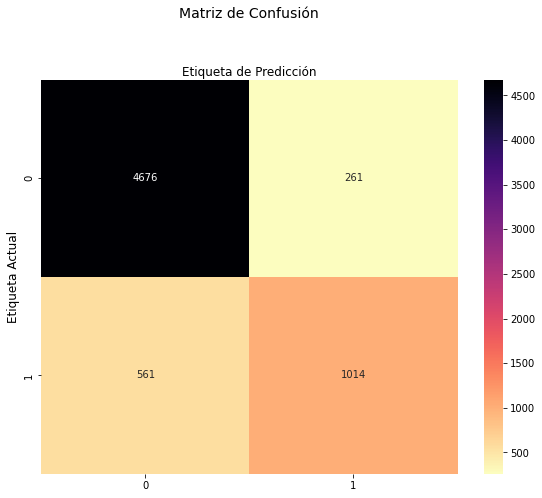

In [33]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

# Definimos las etiquetas de nuestra Matriz de confusión
class_names = [0,1]
fig,ax = plt.subplots(figsize=(8,7)) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

# Creamos nuestra Matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='magma_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de Confusión\n', y=1.1, fontsize=14)
plt.ylabel('Etiqueta Actual', fontsize=12)
plt.xlabel('Etiqueta de Predicción', fontsize=12)
plt.tight_layout();

In [34]:
# Casting
y_val = pd.DataFrame(y_val, columns=['Datos de validación'])
y_pred = pd.DataFrame(y_pred, columns=['Predicciones'])

# Comparando los datos de validación y las de predicciones
comparacion = pd.concat([y_val, y_pred], axis=1)
comparacion.head(10)

,Datos de validación,Predicciones
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [36]:
# Exportamos a un CSV los resultados de las predicciones
comparacion.to_csv(r'D:\Python Scripts & Notebooks\Jupyter Notebooks\Artificial Intelligence\Machine Learning\Proyectos de Machine Learning\resultados.csv', index=False, encode='utf-8')